In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
x_data=np.array([
    [2,1],
    [3,2],
    [3,4],
    [5,6],
    [7,5],
    [2,1],
    [8,9],
    [9,10],
    [6,12],
    [7,2],
    [6,10],
    [3,4]
])
y_data=np.array([0,0,1,1,1,0,1,1,1,1,1,0])
Label=['Y','N']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=.3,random_state=4)

model=RandomForestClassifier()
model.fit(x_train,y_train)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

x_test=np.array([
    [2,2]
])
y_predict=model.predict(x_test)
print(Label[y_predict[0]])

0.875
0.75
Y


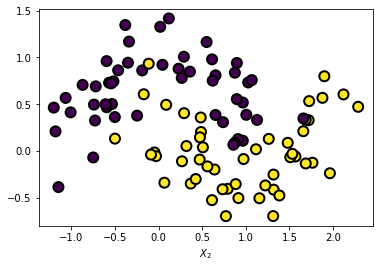

RandomForestClassifier(n_estimators=5, random_state=2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100,
           edgecolor='k',linewidth=2)
plt.xlabel('$X_1$')
plt.xlabel('$X_2$')
plt.show()

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

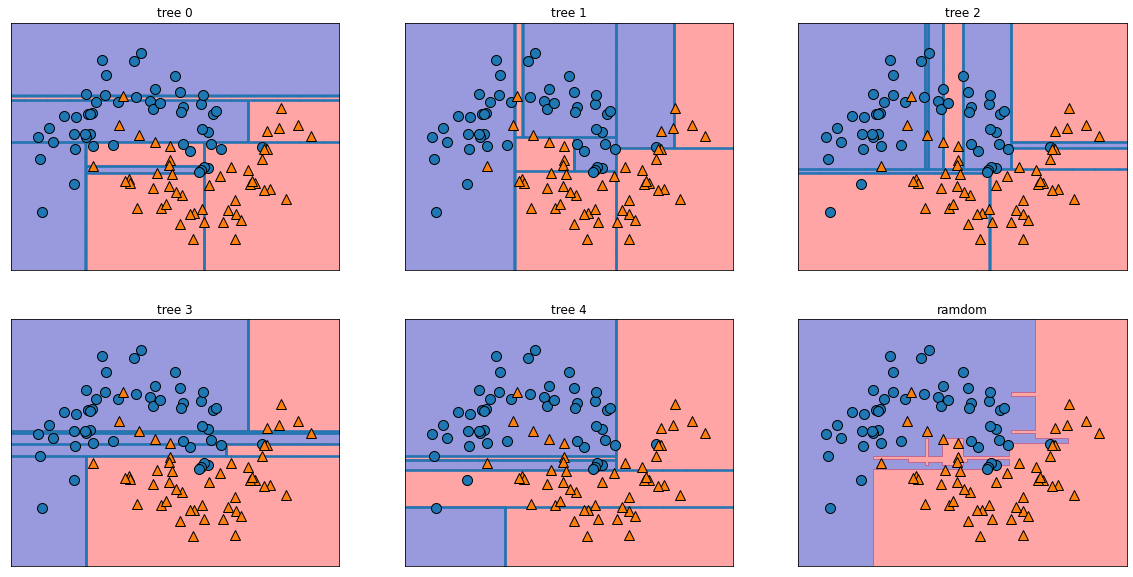

In [9]:
import mglearn

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('ramdom')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [12]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print('train acc:{:.3f}'.format(forest.score(X_train,y_train)))
print('test acc:{:.3f}'.format(forest.score(X_test,y_test)))

train acc:1.000
test acc:0.972


In [14]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target,
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
!pip install statsmodels
import sklearn.metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

wine_data=pd.read_csv('winequality-white.csv',delimiter=';',dtype=float)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


In [19]:
x_data=wine_data.iloc[:,0:-1]
y_data=wine_data.iloc[:,-1]

In [24]:
xTrain,xTest,yTrain,yTest=train_test_split(x_data,y_data,test_size=.3,random_state=53)

mseOos=[]
nTreeList=range(50,500,10)
for iTrees in nTreeList:
    depth=None
    maxFeat=4
    wineRFModel=RandomForestRegressor(n_estimators=iTrees,
                                     max_depth=depth,max_features=maxFeat,
                                     oob_score=False,random_state=531)
    wineRFModel.fit(xTrain,yTrain)
    prediction=wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest,prediction))

NameError: name 'mean_squared_error' is not defined

In [25]:
import numpy as np
from sklearn.cluster import KMeans

x_data=np.array([
    [2,1],
    [3,2],
    [3,4],
    [6,5],
    [7,5],
    [2,5],
    [9,2],
    [6,3],
    [2,5]
])

In [28]:
from sklearn.metrics import accuracy_score
y_data=np.array([1,1,2,0,0,2,1,0,2])
model=KMeans(n_clusters=3,random_state=4)
model.fit(x_data)
print(model.labels_)
print('정확도:{:.2f}'.format(accuracy_score(y_data,model.labels_)))

[1 1 2 0 0 2 0 0 2]
정확도:0.89


In [29]:
import pandas as pd
x_data=pd.DataFrame(x_data,columns=['x','y'])
print(x_data)
x_data['cluster']=model.labels_
print(x_data)

   x  y
0  2  1
1  3  2
2  3  4
3  6  5
4  7  5
5  2  5
6  9  2
7  6  3
8  2  5
   x  y  cluster
0  2  1        1
1  3  2        1
2  3  4        2
3  6  5        0
4  7  5        0
5  2  5        2
6  9  2        0
7  6  3        0
8  2  5        2


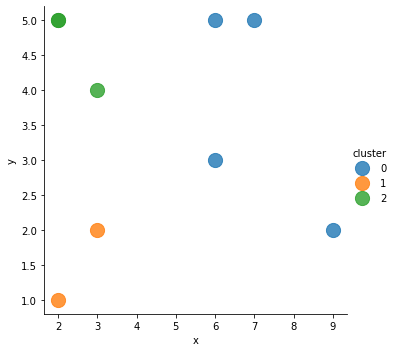

In [31]:
import seaborn as sns
sns.lmplot('x','y',data=x_data,fit_reg=False,scatter_kws={'s':200},hue='cluster')

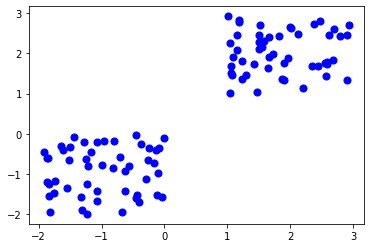

In [39]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
random.seed(42)
X=-2*np.random.rand(100,2)
X1=1+2*np.random.rand(50,2)
X[50:100,:]=X1
plt.scatter(X[:,0],X[:,1],s=50,c='b')
plt.show()

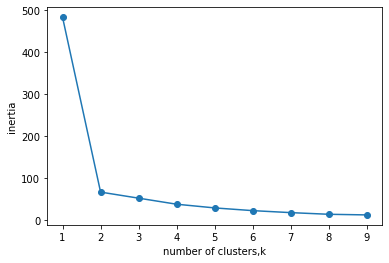

In [41]:
ks=range(1,10)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters,k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()